In [23]:
import pandas as pd
import matplotlib.pyplot as plt

crime_data = pd.read_csv('/Users/marcos/Desktop/data-analysis-homework/pset2/Rate of Violent Crime Offenses by Population_01-17-2024.csv')

In [27]:

crime_data.set_index('Year', inplace=True)
crime_data.columns

Index(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')

In [29]:
crime_data = crime_data.T
crime_data

Year,California Violent Crime,United States Violent Crime
2012,423.5,387.8
2013,402.6,369.1
2014,396.4,361.6
2015,428.0,373.7
2016,444.8,397.5
2017,453.3,394.9
2018,447.5,383.4
2019,442.1,380.8
2020,442.0,398.5
2021,481.2,387.0


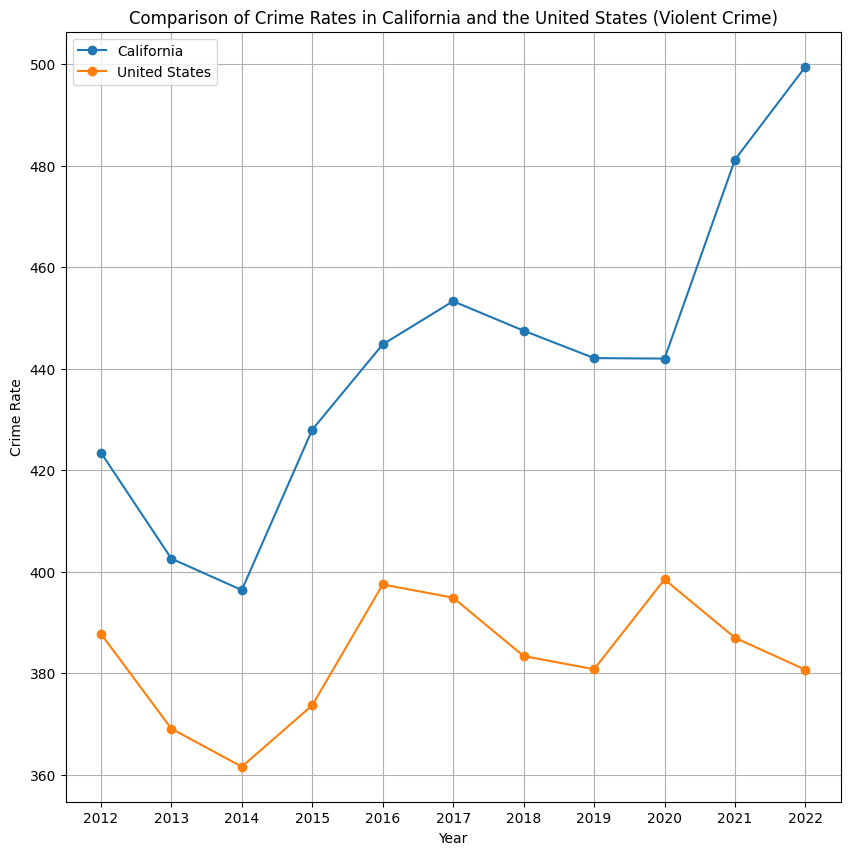

In [32]:
plt.figure(figsize=(10, 10))
plt.plot(crime_data.index, crime_data['California Violent Crime'], label='California', marker='o')
plt.plot(crime_data.index, crime_data['United States Violent Crime'], label='United States', marker='o')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.title('Comparison of Crime Rates in California and the United States (Violent Crime)')
plt.legend()
plt.grid(True)
plt.show()

## Race of Offender per number of people heatmap creator

In [37]:
import os

In [88]:
BASE_DIR = os.getcwd()
csv_path = "offender-race.csv"

df = pd.read_csv(os.path.join(BASE_DIR, csv_path))




In [89]:
df

,Race,Count
0,White,389295
1,Black or African American,378448
2,Unknown,86283
3,American Indian or Alaska Native,12765
4,Asian,8624


In [83]:
import seaborn as sns

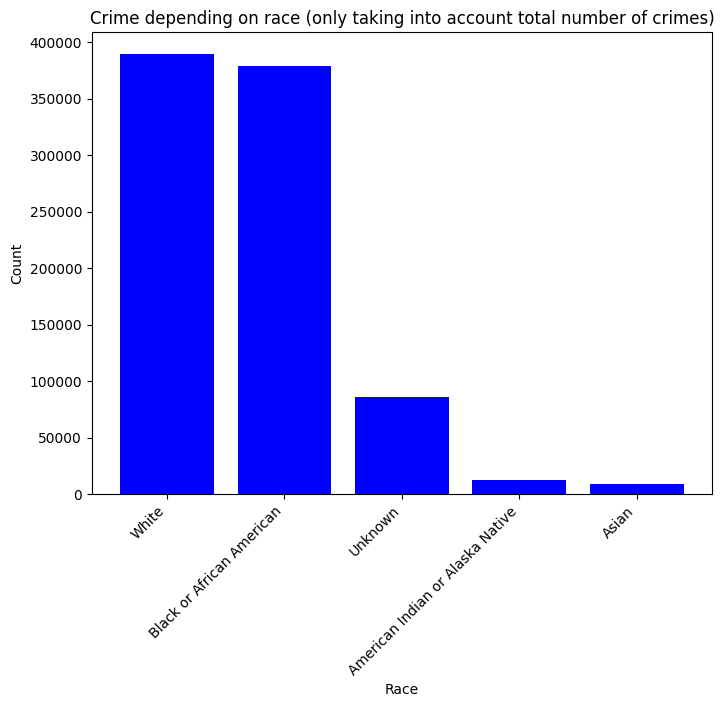

In [90]:
plt.figure(figsize=(8,6))
plt.bar(df['Race'], df['Count'], color='blue')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Crime depending on race (only taking into account total number of crimes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


#### Taking into account total number of population per race in the USA

In [93]:
race_population = {
    'White': 0.75,
    'Black or African American': 0.136,
    'American Indian or Alaska Native': 0.013,
    'Asian': 0.063
}

##### new df without the unkown becasue it doesnt matter in this case

In [91]:
df_small = df.drop(2)
df_small

,Race,Count
0,White,389295
1,Black or African American,378448
3,American Indian or Alaska Native,12765
4,Asian,8624


In [98]:
df_small['Population Percentage'] = df_small['Race'].map(race_population)

df_small['Normalized Count'] = df_small['Count'] // df_small['Population Percentage']

df_small


,Race,Count,Population Percentage,Normalized Count
0,White,389295,0.750,519060.0
1,Black or African American,378448,0.136,2782705.0
3,American Indian or Alaska Native,12765,0.013,981923.0
4,Asian,8624,0.063,136888.0


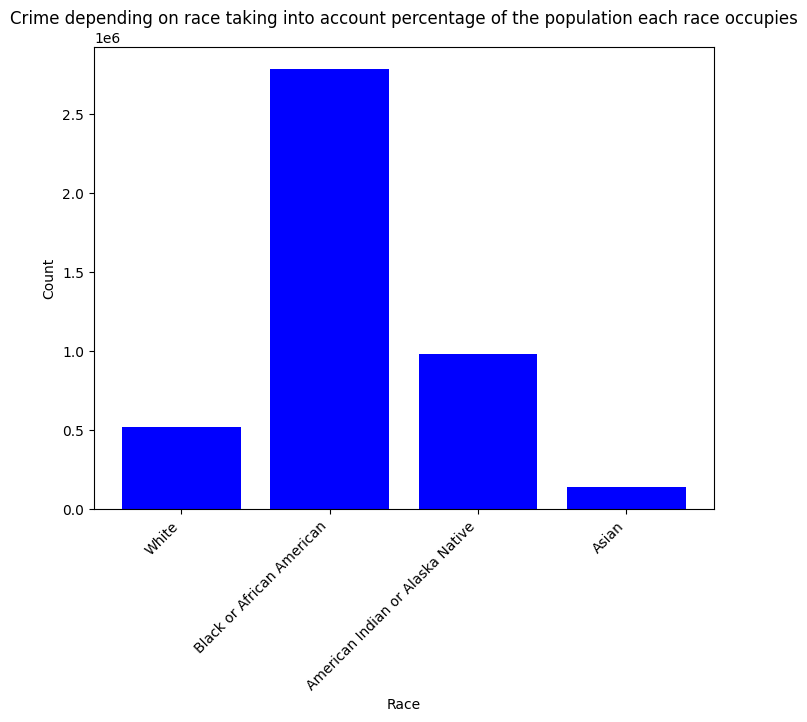

In [100]:
plt.figure(figsize=(8,6))
plt.bar(df_small['Race'], df_small['Normalized Count'], color='blue')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Crime depending on race taking into account percentage of the population each race occupies')
plt.xticks(rotation=45, ha='right')  
plt.show()